<a href="https://colab.research.google.com/github/Daniel-de-Jesus/Especialization/blob/main/Statistics_SimpleLinearML_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise

Consider the dataset below that contains **heights** (in inches/inches) and **weight**s (in pounds/lbs) of fake people.

https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:



*   Split the dataset into 80% for training and 20% for testing
*   Compute the correlation between the training set variables
*   Train a regression model considering **height** as the independent variable and **weight** as the dependent one 
  *   Compute the model determination coefficient
  *   Plot a scatterplot of the two variables containing the regression model (line)
*   Predict the test set
  *  Plot a scatterplot of the two variables containing the regression model (line)
  *   Compute error metrics for regression


















In [3]:
#importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
#loading the dataframe with the dataset
df= pd.read_csv("weight-height.csv")
#checking the dataframe basic informations
#df.describe()
df.columns
#df.info()

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [216]:
X= df[['Height']]
y = df[['Weight']]
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [117]:
#the sklearn split sample library
from sklearn.model_selection import train_test_split

#split the dataser in 80% for training and 20% for testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size =0.2, random_state=42)

In [118]:
#we may check the sets created
#train set
print(f'X_train.shape= {X_train.shape}')
print(f'y_train.shape= {y_train.shape}')
#test set
print(f'X_test.shape= {X_test.shape}')
print(f'y_test.shape= {y_test.shape}')

X_train.shape= (8000, 1)
y_train.shape= (8000, 1)
X_test.shape= (2000, 1)
y_test.shape= (2000, 1)


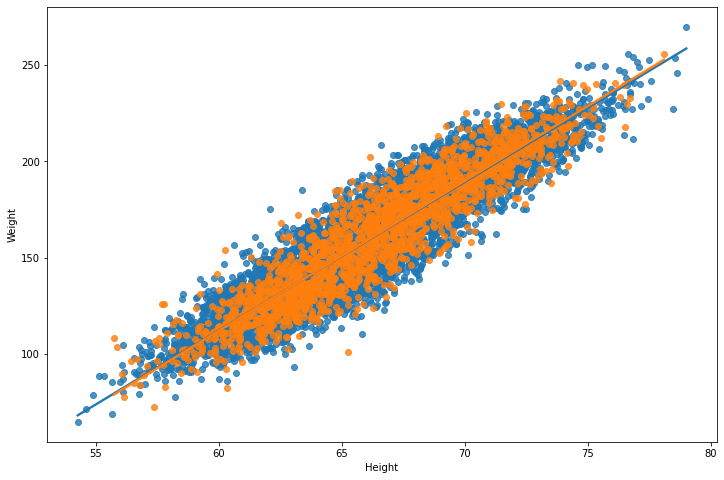

In [119]:
plt.figure(figsize=(12,8))
sns.regplot(x= X_train, y= y_train)
sns.regplot(x= X_test, y= y_test)

In [96]:
#importing the ML linear model
from sklearn.linear_model import LinearRegression
#training the linear model
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#coeficient of determination
print(f'Coeficient of determination = {reg.score(X_train, y_train)}')

In [209]:
results = pd.DataFrame({
    'Height (Inches)': X_test['Height'],
    'Weight (Prediction)': y_pred_New.round(2),
    'Weight (True)': y_test['Weight'].round(2),
    'Erro (Residual)': (y_test['Weight'] - y_pred_New).round(2),
    'Erro (Absolute)': abs(y_test['Weight'] - y_pred_New).round(2),
})

results

,Height (Inches),Weight (Prediction),Weight (True),Erro (Residual),Erro (Absolute)
6252,68.687232,173.12,173.12,0.0,0.0
4684,68.829334,195.16,195.16,0.0,0.0
1731,66.398128,170.22,170.22,0.0,0.0
4742,71.929340,215.05,215.05,0.0,0.0
4521,67.042903,182.72,182.72,0.0,0.0
...,...,...,...,...,...
6412,65.748601,142.07,142.07,0.0,0.0
8285,60.731857,119.97,119.97,0.0,0.0
7853,62.188933,125.18,125.18,0.0,0.0
1095,67.068304,187.57,187.57,0.0,0.0


In [ ]:
regression_line_x = X['Height']
regression_line_y=[]
#regression from all data within the model
regression_line_y_0 = reg.predict(X)
for i in range(len(regression_line_y_0)):
  regression_line_y.append(regression_line_y_0[i][0])
  print(regression_line_y_0[i][0])
regression_line_y

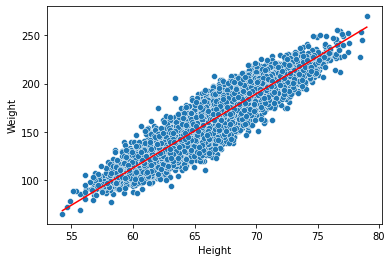

In [208]:
sns.scatterplot(x=X_train['Height'], y=y_train['Weight'])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")

In [ ]:
sns.scatterplot(data= results, x='Height (Inches)', y=y_test['Weight'])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")

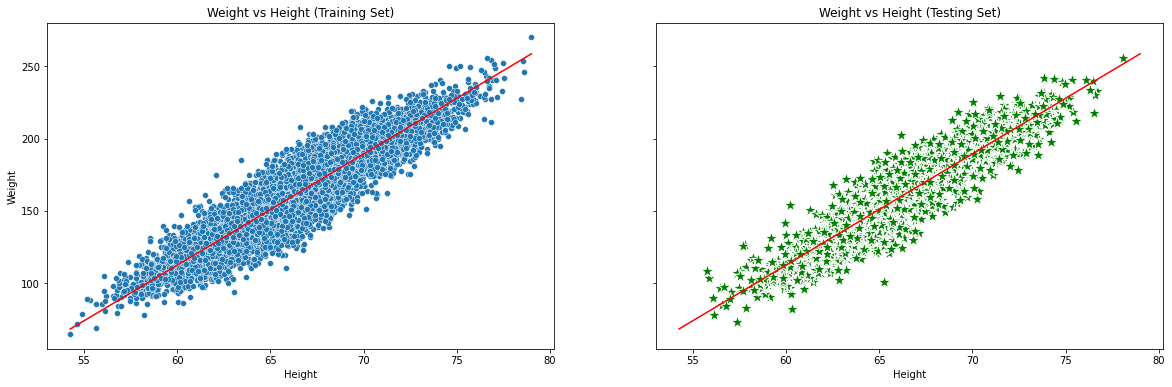

In [212]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

sns.scatterplot(x=X_train['Height'], y=y_train['Weight'], ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])

axs[0].set_title('Weight vs Height (Training Set)')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Weight')

sns.scatterplot(x=X_test['Height'], y=y_test['Weight'], color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])

axs[1].set_title('Weight vs Height (Testing Set)')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Weight')

display()

In [214]:
#creates a copy of train dataframe
X_labeled = X.copy()

#creates a column named label with all values = Train
X_labeled['Label'] = 'Train'

#set the entrances whose the idex are equal of x test index iqual Test
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Height,Label
0,73.847017,Test
1,68.781904,Train
2,74.110105,Train
3,71.730978,Test
4,69.881796,Train
...,...,...
9995,66.172652,Train
9996,67.067155,Train
9997,63.867992,Train
9998,69.034243,Test


Text(0, 0.5, 'Weight')

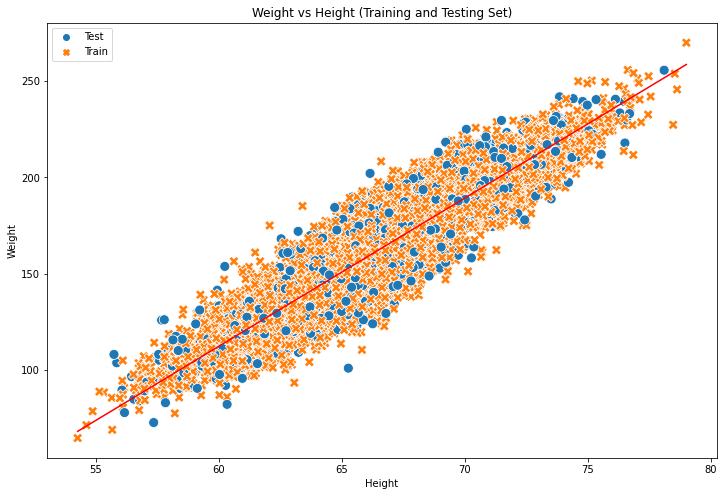

In [218]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X_labeled, x='Height', y=y['Weight'], hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Weight vs Height (Training and Testing Set)')
plt.xlabel('Height')
plt.ylabel('Weight')

Statistical scores and metrics

In [226]:
#Mean Absolute Error- MAE
from sklearn.metrics import mean_absolute_error
# comparism between the generate curve and the experimental one
MAE=  mean_absolute_error(y_test, y_pred)

#Mean Squared Error- MSE
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred)

#Root Mean Squared Error- RMSE
RMSE_Manually= np.sqrt(MSE)
RMSE= mean_squared_error(y_test, y_pred, squared=False)

#R2
r2_score_reg= reg.score(X_test, y_test)
from sklearn.metrics import r2_score
r2_score_sk= r2_score(y_test, y_pred)

In [227]:
print(f'The mean absolute error= {MAE}')
print(f'The mean squared error= {MSE}')
print(f'The Root Mean Squared Error Manually= {RMSE_Manually}')
print(f'The Root Mean Squared Error from Sklearn tools= {RMSE}')
print(f'The r2 scrore from reg function= {r2_score_reg}')
print(f'The r2 scrore from Sklearn tools= {r2_score_sk}')

The mean absolute error= 9.691933801884572
The mean squared error= 149.00350418448127
The Root Mean Squared Error Manually= 12.206699151878908
The Root Mean Squared Error from Sklearn tools= 12.206699151878908
The r2 scrore from reg function= 0.8577317777038499
The r2 scrore from Sklearn tools= 0.8577317777038499
